In [1]:
import numpy as np
import tensorflow as tf

print(tf.__version__)

x_data = np.array([[1,2,0],[5,4,3],[1,2,-1],[3,1,0],[2,4,2],
                   [4,1,2],[-1,3,2],[4,3,3],[0,2,6],[2,2,1],
                   [1,-2,-2],[0,1,3],[1,1,3],[0,1,4],[2,3,3]])

y_data = np.array([-4,4,-6,3,-4,9,-7,5,6,0,4,3,5,5,1])

print(x_data.shape, y_data.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(3,), activation='linear'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.summary()

training = model.fit(x_data, y_data, epochs=1000)

2.6.0
(15, 3) (15,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 177ms/step - loss: 16.9445
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 14.1178
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 12.3959
Epoch 4/1000
1/1 [==============================] - 0s 994us/step - loss: 11.2420
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 10.3892
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 9.7037
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.1182
Epoch 8/1000
1/1 [==============================] - 0s 997us/step - loss: 

In [2]:
t_data = [[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,2]]
r_data = [2*data[0] - 3*data[1] + 2*data[2] for data in t_data]
p_data = model.predict(np.array(t_data))

print(p_data)
print(r_data)

[[-5.0002303]
 [-2.9999318]
 [-3.9994226]
 [ 8.99933  ]
 [15.000159 ]]
[-5, -3, -4, 9, 15]


In [3]:
print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9999312],
       [-3.0000694],
       [ 1.9999524]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00046104], dtype=float32)>]


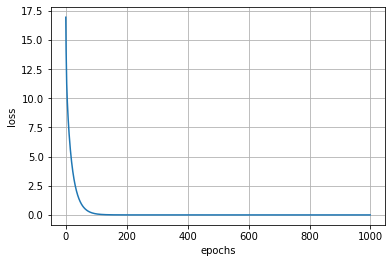

In [4]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(training.history['loss'])

plt.show()